In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


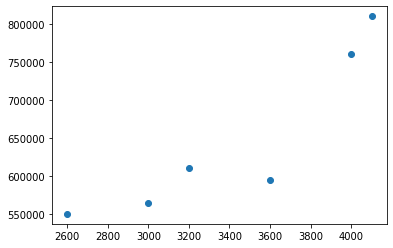

In [4]:
%matplotlib inline
plt.scatter(df.area, df.price)

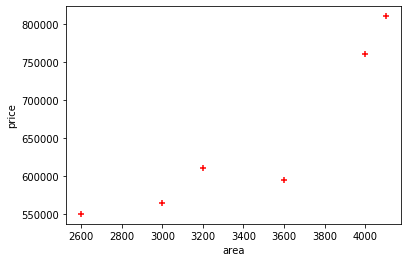

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='r', marker='+')

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[3300]])

array([628813.88621022])

In [8]:
reg.coef_

array([167.30954677])

In [9]:
reg.intercept_

76692.3818707813

In [10]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [11]:
d = pd.read_csv('area.csv')
d

,area
0,2100
1,3400
2,3544
3,2000
4,5000


In [12]:
reg.predict(d)

array([428042.43008679, 645544.84088717, 669637.41562199, 411311.47540984,
       913240.11571842])

In [13]:
p=reg.predict(d)
d['prices']=p

In [14]:
d

,area,prices
0,2100,428042.430087
1,3400,645544.840887
2,3544,669637.415622
3,2000,411311.475410
4,5000,913240.115718


In [15]:
d.to_csv('prediction1.csv')

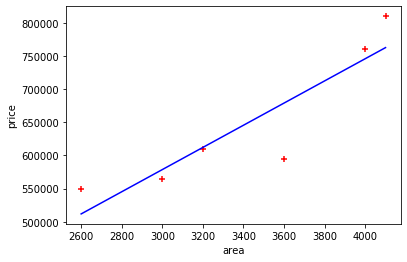

In [16]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='r', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='b')

In [17]:
import pickle

In [18]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)

In [19]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [22]:
mp.predict([[5000]])

array([913240.11571842])

In [24]:
from sklearn.externals import joblib

In [25]:
joblib.dump(reg, 'model_prdctn')

['model_prdctn']

In [26]:
prediction=joblib.load('model_prdctn')

In [28]:
prediction.predict([[5000]])

array([913240.11571842])